# ライブラリ調整

In [1]:
# !conda list opencv

# packages in environment at /Users/user/anaconda3:
#
# Name                    Version                   Build  Channel
libopencv                 4.2.0                    py37_2    conda-forge
opencv                    4.2.0                    py37_2    conda-forge
opencv-contrib-python     3.4.2.16                 pypi_0    pypi
opencv-python             3.4.2.16                 pypi_0    pypi
py-opencv                 4.2.0            py37h5ca1d4c_2    conda-forge


In [2]:
# SIFTを使用できるようにバージョンを下げる
# !pip install opencv-python==3.4.2.16
# !pip install opencv-contrib-python==3.4.2.16

In [3]:
# !conda list opencv

# packages in environment at /Users/user/anaconda3:
#
# Name                    Version                   Build  Channel
libopencv                 4.2.0                    py37_2    conda-forge
opencv                    4.2.0                    py37_2    conda-forge
opencv-contrib-python     3.4.2.16                 pypi_0    pypi
opencv-python             3.4.2.16                 pypi_0    pypi
py-opencv                 4.2.0            py37h5ca1d4c_2    conda-forge


In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# WEBサイトコピー（https://www.tech-tech.xyz/sift-surf-akaze.html）

In [3]:
# WEBサイトコピー
img1 = cv2.imread('dollar.png')
img2 = cv2.imread('dollar_in_scene.png')

#特徴抽出機の生成
detector = cv2.xfeatures2d.SIFT_create()
#kpは特徴的な点の位置 destは特徴を現すベクトル
kp1, des1 = detector.detectAndCompute(img1, None)
kp2, des2 = detector.detectAndCompute(img2, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用
good = []
match_param = 0.5
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None,flags=2)
# cv2.imwrite("shift_result.png", img3)

plt.imshow(img3)
plt.show()

error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1121: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'


In [4]:
# 正解でテスト
img1 = cv2.imread('example_opencv_data/temp/ファンタオレンジ.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('example_opencv_data/正解/ファンタオレンジ.jpeg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#特徴抽出機の生成
detector = cv2.xfeatures2d.SIFT_create()
#kpは特徴的な点の位置 destは特徴を現すベクトル
kp1, des1 = detector.detectAndCompute(img1, None)
kp2, des2 = detector.detectAndCompute(img2, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用
good = []
match_param = 0.5
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None,flags=2)
# cv2.imwrite("shift_result.png", img3)

plt.imshow(img3)
plt.show()

error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


* 正解画像では特徴点が上手く捕らえられている

In [1]:
# 特徴点の表示
# テンプレート
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.imshow(out1)
plt.show()

NameError: name 'cv2' is not defined

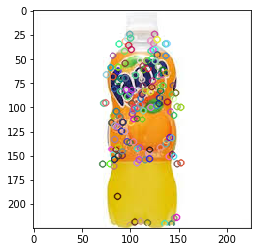

In [348]:
# 特徴点の表示
# オリジナルデータ
out2 = cv2.drawKeypoints(img2, kp2, None)
plt.imshow(out2)
plt.show()

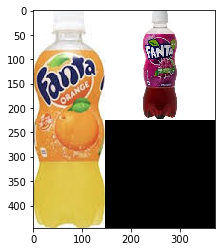

In [530]:
# 不正解でテスト
img1 = cv2.imread('example_opencv_data/temp/ファンタオレンジ.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('example_opencv_data/不正解/ファンタグレープ.jpeg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#特徴抽出機の生成
detector = cv2.xfeatures2d.SIFT_create()
#kpは特徴的な点の位置 destは特徴を現すベクトル
kp1, des1 = detector.detectAndCompute(img1, None)
kp2, des2 = detector.detectAndCompute(img2, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用
good = []
match_param = 0.5
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None,flags=2)
# cv2.imwrite("shift_result.png", img3)

plt.imshow(img3)
plt.show()

* 不正解ラベルではマッチする特徴点がなく、正解と不正解を分離できている

# 正解、不正解データで評価
* 画像データはネットから取得し、ローカルに保存したものを使用

In [657]:
# 商品と価格の辞書（これをもとに金額を表示、合計する）
item_price = {'maxコーヒー':100, 'カルピス':110, 'ジンジャエール':120, 'ファンタオレンジ':130, '三ツ矢サイダー':140}

In [550]:
# テンプレート画像読み込み
path = "./example_opencv_data/temp"
temp_files = os.listdir(path)
temp_files = [files for files in files_temp if files.endswith("png")]
print(temp_files)

# テンプレートをarrayとしてリスト化
temp_data = []
for n, data in enumerate(temp_files):
    temp = cv2.imread("example_opencv_data/temp/" + data)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    temp_data.append(temp)

['ジンジャエール.png', 'カルピス.png', '三ツ矢サイダー.png', 'maxコーヒー.png', 'ファンタオレンジ.png']


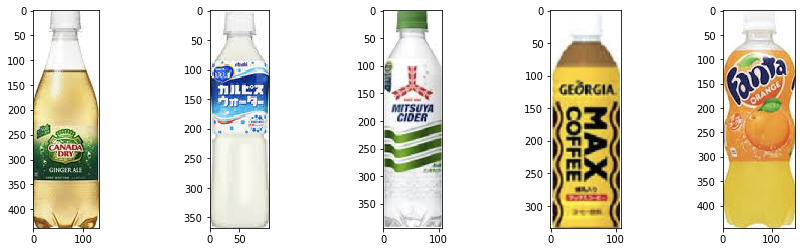

In [633]:
# テンプレート画像の表示（確認用）
plt.subplots(1, len(temp_data) ,figsize=(15, 4))
for n, img in enumerate(temp_data):
    plt.subplot(1, len(temp_data), n+1)
    plt.imshow(img)
plt.show()

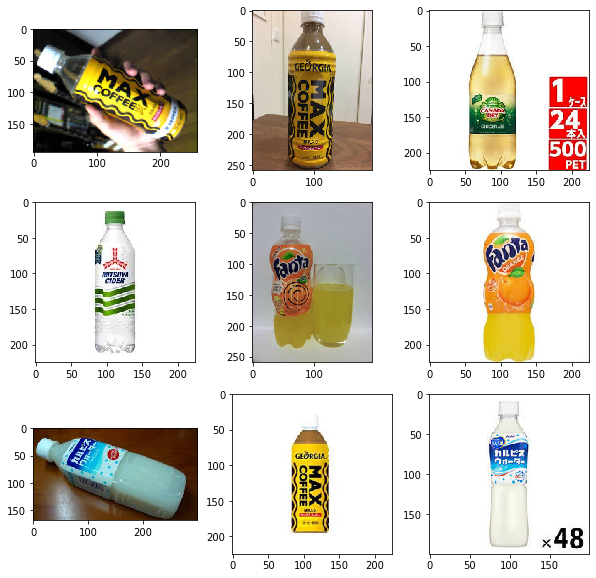

In [646]:
# テンプレートに対する正解データ
path = "./example_opencv_data/正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
plt.subplots(3, 3 ,figsize=(10, 10))
for n, data in enumerate(files):
    img = cv2.imread("example_opencv_data/正解/" + data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, n+1)
    plt.imshow(img)
plt.show()

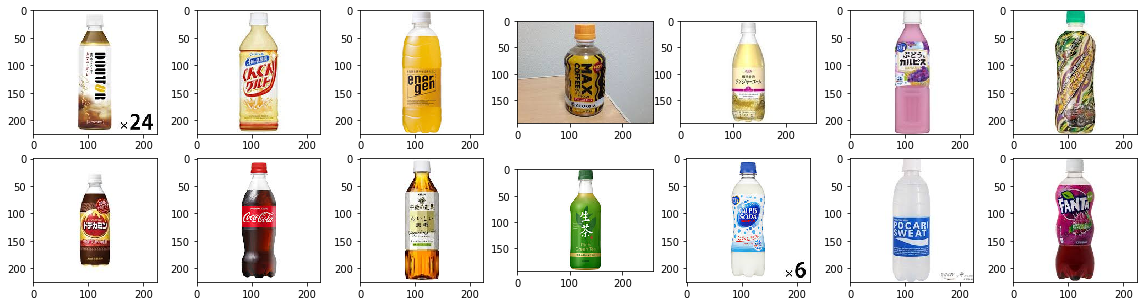

In [644]:
# 不正解データ
path = "./example_opencv_data/不正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
plt.subplots(2, 7 ,figsize=(20, 5))
for n, data in enumerate(files):
    img = cv2.imread("example_opencv_data/不正解/" + data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 7, n+1)
    plt.imshow(img)
plt.show()

In [655]:
# 画像分類
def classfiler(files, path, param=0.5, num=10):
    """
    SIFTを用いた画像分類
    パラメーターとして以下を調整
    param：最も近い点と2番目に近い点の距離の比率。
    num：マッチした特徴点の数の下限
    """
    # 合計金額の初期化
    price_sum = 0
    for data in files:
        #識別したい画像を読み込む
        img = cv2.imread(path + "/" + data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # 画像マッチング
        for temp, temp_file in zip(temp_data, temp_files):
            #特徴抽出機の生成
            detector = cv2.xfeatures2d.SIFT_create()
            #kpは特徴的な点の位置 destは特徴を現すベクトル
            kp1, des1 = detector.detectAndCompute(temp, None)
            kp2, des2 = detector.detectAndCompute(img, None)
            #特徴点の比較機
            bf = cv2.BFMatcher()
            matches = bf.knnMatch(des1,des2, k=2)
            #割合試験を適用(２番目との差を param)
            good = []
            match_param = param
            for m,n in matches:
                if m.distance < match_param*n.distance:
                    good.append([m])
            # good特徴点 num 個以上でマッチしたとする
            if len(good)>num:
                # テンプレート表示
                plt.subplots(1,2,figsize=(5, 5))
                plt.subplot(1,2,1)
                plt.title('temp')
                plt.imshow(temp)
                # origin表示
                plt.subplot(1,2,2)
                plt.title('origin')
                plt.imshow(img)
                plt.show()
                
                # 値段表示
                item = temp_file.strip(".png'")
                price = item_price[item]
                price_sum += price
                print("{}：{}円".format(item, price))
                print("合計金額：", price_sum, "円")

In [6]:
data

NameError: name 'data' is not defined

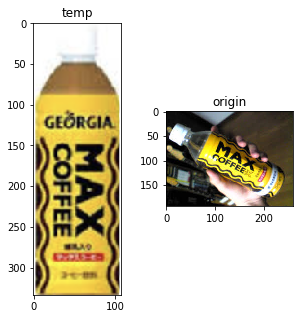

maxコーヒー：100円
合計金額： 100 円


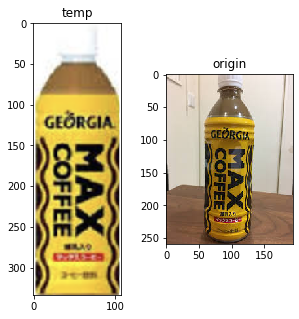

maxコーヒー：100円
合計金額： 200 円


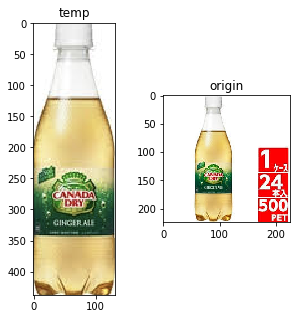

ジンジャエール：120円
合計金額： 320 円


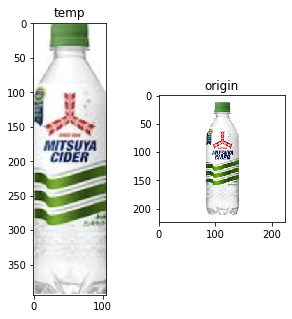

三ツ矢サイダー：140円
合計金額： 460 円


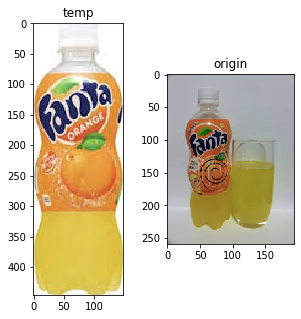

ファンタオレンジ：130円
合計金額： 590 円


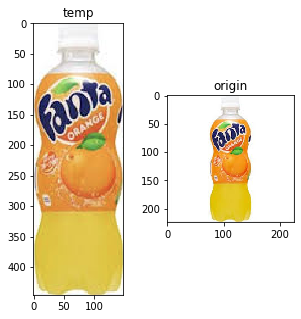

ファンタオレンジ：130円
合計金額： 720 円


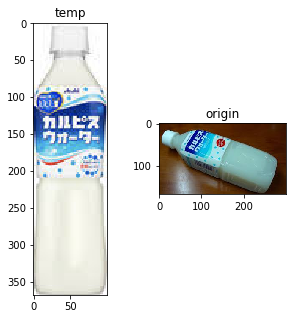

カルピス：110円
合計金額： 830 円


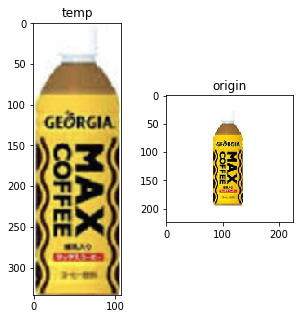

maxコーヒー：100円
合計金額： 930 円


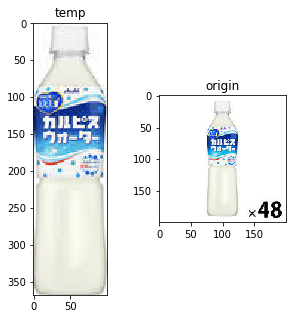

カルピス：110円
合計金額： 1040 円


In [648]:
# 正解データ
path = "./example_opencv_data/正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
classfiler(files, path, param=0.59, num=6)

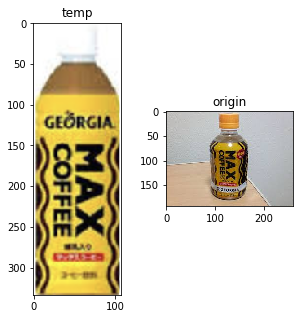

maxコーヒー：100円
合計金額： 100 円


In [649]:
# 不正解データ
path = "./example_opencv_data/不正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
classfiler(files, path, param=0.5, num=2)

### 現状
* 正解データ対しては、商品の角度や明るさに関係なく全て識別できている
* 不正解データに対して、違いが大きさのみの画像（maxコーヒー）以外は識別できている

### 今後
* 現実を考慮すると、不正解データに対しても明るさや角度を変化させた検証が必要
* 実際の写真データで検証
* 各トリガーとの繋ぎ方（処理の流れや、終わり方）

# その他の特徴量抽出方法（上記手法でうまくいかなかった場合検討）

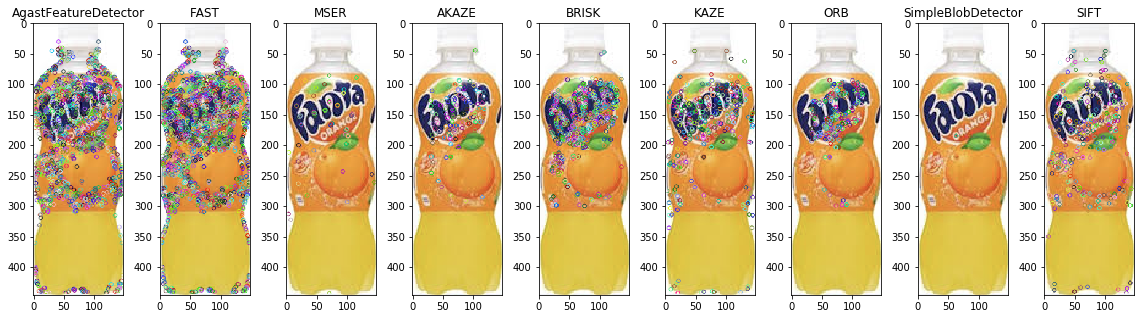

In [505]:
plt.subplots(1,9,figsize=(20, 5))

# AgastFeatureDetector
detector = cv2.AgastFeatureDetector_create()
# kp1, des1 = detector.detectAndCompute(img1, None)
kp1 = detector.detect(img1)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,1)
plt.imshow(out1)
plt.title('AgastFeatureDetector')

# FAST
detector = cv2.FastFeatureDetector_create()
# kp1, des1 = detector.detectAndCompute(img1, None)
kp1 = detector.detect(img1)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,2)
plt.imshow(out1)
plt.title('FAST')

# MSER
detector = cv2.MSER_create()
# kp1, des1 = detector.detectAndCompute(img1, None)
kp1 = detector.detect(img1)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,3)
plt.imshow(out1)
plt.title('MSER')

# AKAZE
detector = cv2.AKAZE_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,4)
plt.imshow(out1)
plt.title('AKAZE')

# BRISK
detector = cv2.BRISK_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,5)
plt.imshow(out1)
plt.title('BRISK')

# KAZE
detector = cv2.KAZE_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,6)
plt.imshow(out1)
plt.title('KAZE')

# ORB (Oriented FAST and Rotated BRIEF)
detector = cv2.ORB_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,7)
plt.imshow(out1)
plt.title('ORB')

# SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create()
# kp1, des1 = detector.detectAndCompute(img1, None)
kp1 = detector.detect(img1)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,8)
plt.imshow(out1)
plt.title('SimpleBlobDetector')

# SIFT
detector = cv2.xfeatures2d.SIFT_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,9)
plt.imshow(out1)
plt.title('SIFT')

plt.show()

# 方法による比較

In [506]:
method = {"AgastFeatureDetector" : cv2.AgastFeatureDetector_create(),
          "FastFeatureDetector" : cv2.FastFeatureDetector_create(),
          "MSER" : cv2.MSER_create(),
          "AKAZE" : cv2.AKAZE_create(),
          "BRISK" : cv2.BRISK_create(),
          "KAZE" : cv2.KAZE_create(),
          "ORB" : cv2.ORB_create(),
          "SIFT" : cv2.xfeatures2d.SIFT_create(),
          "SimpleBlobDetector" : cv2.SimpleBlobDetector_create()}

In [656]:
# 特徴量抽出
def keypoints(img1, name):
    kp1 = method[name].detect(img1)
    out1 = cv2.drawKeypoints(img1, kp1, None)
    plt.imshow(out1)
    plt.title(name)
    plt.show()
    
# 画像分類
# ORB, AKAZE, KAZE, BRISK, SIFTは、特徴点だけではなく、特徴量も計算できる。
def matches(files, path, name, param=0.5, num=10):
    price_sum = 0
    for data in files:
        #識別したい画像を読み込む
        img = cv2.imread(path + "/" + data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # 画像マッチング
        for temp, temp_file in zip(temp_data, temp_files):
            #特徴抽出機の生成
            detector = cv2.xfeatures2d.SIFT_create()
            #kpは特徴的な点の位置 destは特徴を現すベクトル
            kp1, des1 = method[name].detectAndCompute(temp, None)
            kp2, des2 = method[name].detectAndCompute(img, None)
            #特徴点の比較機
            bf = cv2.BFMatcher()
            matches = bf.knnMatch(des1,des2, k=2)
            #割合試験を適用(２番目との差を param)
            good = []
            match_param = param
            for m,n in matches:
                if m.distance < match_param*n.distance:
                    good.append([m])
            # good特徴点 num 個以上でマッチしたとする
            if len(good)>num:
                # テンプレート表示
                plt.subplots(1,2,figsize=(5, 5))
                plt.subplot(1,2,1)
                plt.title('temp')
                plt.imshow(temp)
                # origin表示
                plt.subplot(1,2,2)
                plt.title('origin')
                plt.imshow(img)
                plt.show()
                
                # 値段表示
                item = temp_file.strip(".png'")
                price = item_price[item]
                price_sum += price
                print("{}：{}円".format(item, price))
                print("合計金額：", price_sum, "円")

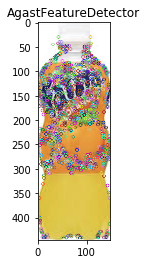

In [557]:
# 特徴点の表示
keypoints(img1, "AgastFeatureDetector")

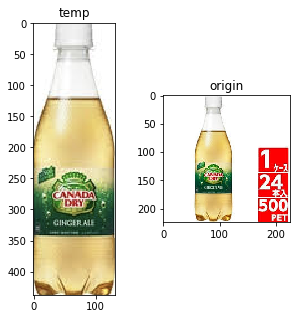

ジンジャエール：120円
合計金額： 120 円


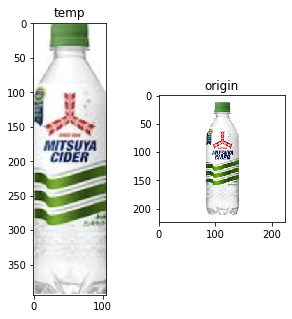

三ツ矢サイダー：140円
合計金額： 260 円


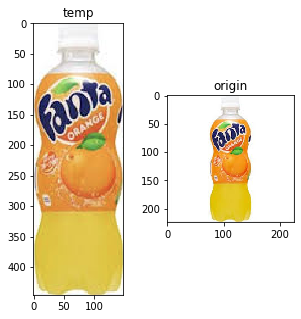

ファンタオレンジ：130円
合計金額： 390 円


In [652]:
# ORB, AKAZE, KAZE, BRISK, SIFTは、特徴点だけではなく、特徴量も計算できる。
# 正解データ
path = "./example_opencv_data/正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
matches(files, path, "KAZE", param=0.59, num=6)

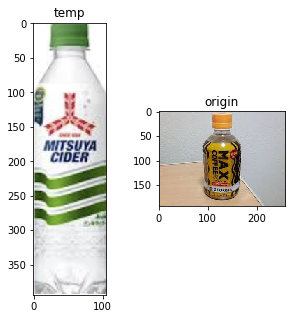

三ツ矢サイダー：140円
合計金額： 140 円


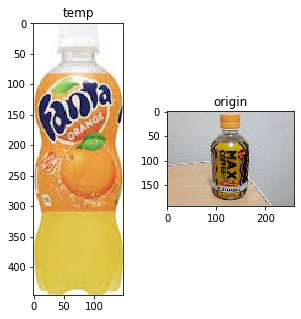

ファンタオレンジ：130円
合計金額： 270 円


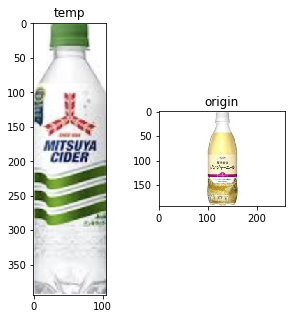

三ツ矢サイダー：140円
合計金額： 410 円


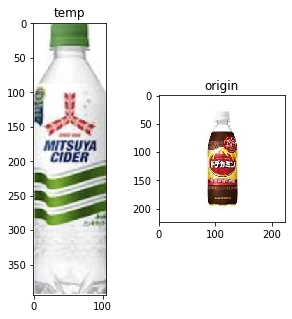

三ツ矢サイダー：140円
合計金額： 550 円


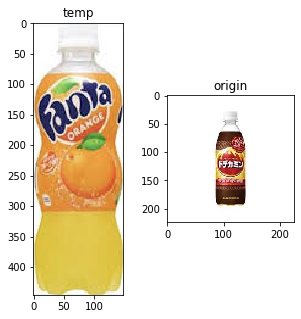

ファンタオレンジ：130円
合計金額： 680 円


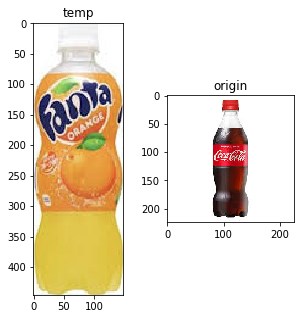

ファンタオレンジ：130円
合計金額： 810 円


In [653]:
# 不正解データ
path = "./example_opencv_data/不正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
matches(files, path, "KAZE", param=0.59, num=6)